# Base parameters

This notebook contains the initial parameters evaluated for each simulation performed in order to assess whether the system has equilibrated or not. Parameters that are considered are : 
- Temperature
- Density
- Potential
for all simulations of the mutant and for the simulation of the WT.

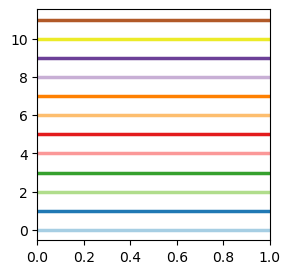

In [2]:
import numpy as np
import pandas as pd
import math
import scipy as sc
import matplotlib.pyplot as plt
import os
import MDAnalysis as mda
import matplotlib.ticker as ticker
from matplotlib import axes
import sys
np.set_printoptions(threshold=sys.maxsize)

from MDAnalysis.analysis import rms, align, diffusionmap
from MDAnalysis.lib import distances
from MDAnalysis.analysis.align import AlignTraj
from MDAnalysis.analysis.rms import RMSF

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#new_cmap = ['#1F78B4','#FB9A99','#E31A1C']
new_cmap = ['tab:blue','tab:orange','tab:green']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors = rtg_r(np.linspace(0,1,3))

new_cmap = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#ECEC28','#B15928']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors = rtg_r(np.linspace(0,1,12))

#Test colormap
fig = plt.figure(figsize=(3,3))

for i,color in enumerate(colors):
    plt.axhline(i, color=colors[i], linewidth=2.5)
    

In [4]:
datadir = os.getcwd()
datadir

'/Volumes/TERESA-HDD/CBP_project'

### Import data

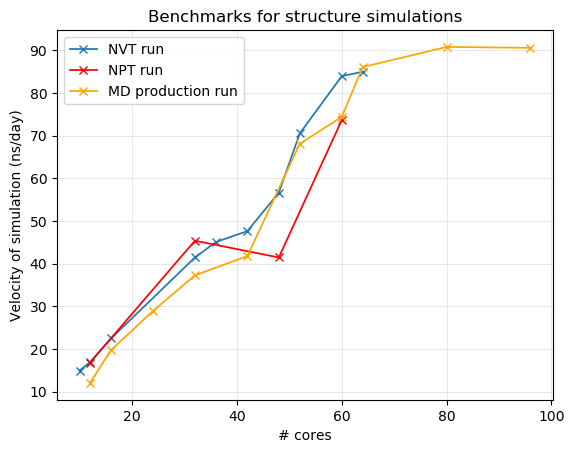

<Figure size 9000x18000 with 0 Axes>

In [74]:
# NVT benchmark

N_cores_nvt=[10, 12, 16, 32, 36, 42, 48, 52, 60, 64]
v_sim_nvt=[ 14.935, 16.941, 22.472, 41.435, 45.049, 47.611, 56.622, 70.489, 83.898, 84.931]

# NPT benchmark
N_cores_npt=[12, 32, 48, 60]
v_sim_npt=[16.809, 45.364, 41.434,73.597]

# MD benchmark
N_cores_md=[12, 16, 24, 32, 42, 52, 60, 64, 80, 96]
v_sim_md=[12.057, 19.755, 28.909, 37.256, 41.760, 68.073, 74.354, 86.035,  90.751, 90.530 ]

ax=plt.subplot(111)

ax.plot(N_cores_nvt,v_sim_nvt, marker = 'x', lw = 1.25, label='NVT run')
ax.plot(N_cores_npt,v_sim_npt, marker = 'x', lw = 1.25, color = 'r', label='NPT run')
ax.plot(N_cores_md,v_sim_md, marker = 'x', lw = 1.25, color = 'orange', label='MD production run')
ax.legend(loc="best")
ax.grid(color = '#DCDCDC', lw = 0.5)

plt.figure(figsize=(15, 30), dpi=600)


ax.set_xlabel("# cores")
ax.set_ylabel("Velocity of simulation (ns/day)")
ax.set_title("Benchmarks for structure simulations")



In [76]:
datadir = os.getcwd()
# -------------------- 8D4J -----------------------
data3 = datadir+'/mutant_8D4J/3rd_simulation_600ns'
data4 = datadir+'/mutant_8D4J/4th_simulation_600ns'
data5 = datadir+'/mutant_8D4J/5th_simulation_600ns'

POT_8D4J_3 = data3+'/base-parameters/potential.xvg'
TEMP_8D4J_3 = data3+'/base-parameters/temperature.xvg'
DENS_8D4J_3 = data3+'/base-parameters/density.xvg'

POT_8D4J_4 = data4+'/base-parameters/potential.xvg'
TEMP_8D4J_4 = data4+'/base-parameters/temperature.xvg'
DENS_8D4J_4 = data4+'/base-parameters/density.xvg'

POT_8D4J_5 = data5+'/base-parameters/potential.xvg'
TEMP_8D4J_5 = data5+'/base-parameters/temperature.xvg'
DENS_8D4J_5 = data5+'/base-parameters/density.xvg'

# -------------------- 7VH8 -----------------------
dataWT = datadir+'/WT_7VH8'

POT_7VH8 = dataWT+'/base-parameters/potential.xvg'
TEMP_7VH8 = dataWT+'/base-parameters/temperature.xvg'
DENS_7VH8 = dataWT+'/base-parameters/density.xvg'


# -------------------- 6XHU -----------------------
dataWT = datadir+'/WT_6XHU'

POT_6XHU = dataWT+'/base-parameters/potential.xvg'
TEMP_6XHU = dataWT+'/base-parameters/temperature.xvg'
DENS_6XHU = dataWT+'/base-parameters/density.xvg'

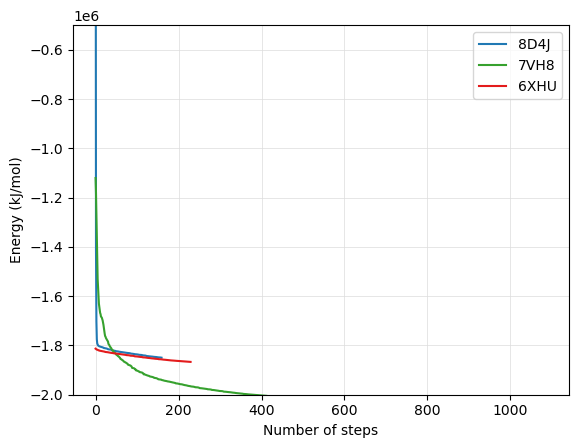

In [81]:
pot_df3=pd.read_csv(POT_8D4J_3, sep='\s+', header=None, names=['time','energy'])
pot_8d4j3 = pot_df3.to_numpy()

pot_dfwt=pd.read_csv(POT_7VH8, sep='\s+', header=None, names=['time','energy'])
pot_7vh8 = pot_dfwt.to_numpy()

pot_dfwt=pd.read_csv(POT_6XHU, sep='\s+', header=None, names=['time','energy'])
pot_6xhu= pot_dfwt.to_numpy()


f = plt.figure()
ax = f.add_subplot(111)
#ax = plt.subplot(111)

ax.plot(pot_8d4j3[:,0], pot_8d4j3[:,1] ,color = colors[1], label = "8D4J") 
ax.plot(pot_7vh8[:,0], pot_7vh8[:,1], color = colors[3], label = "7VH8") 
ax.plot(pot_6xhu[:,0], pot_6xhu[:,1], color = colors[5], label = "6XHU") 

#ax.set_title("Potential - steepest descent algorithm")
ax.set_xlabel("Number of steps")
ax.set_ylabel(r"Energy (kJ/mol)") 
ax.legend()
ax.grid(color = '#DCDCDC', lw = 0.5)
ax.set_ylim([-2.0e6, -0.5e6])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.savefig('potential.png')

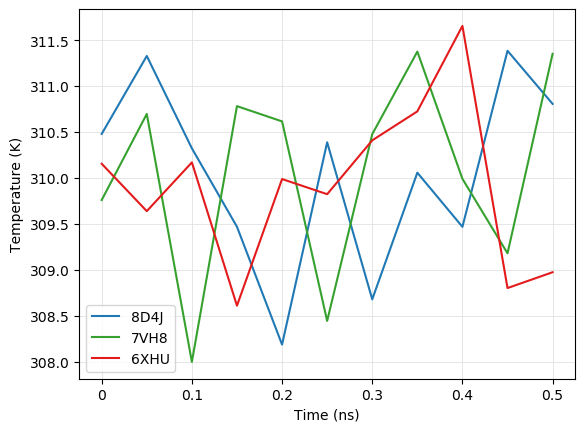

In [80]:
temp_df3 = pd.read_csv(TEMP_8D4J_3, sep='\s+', header=None, names=['time (ps)','temperature (K)'])
temp_8d4j3 = temp_df3.to_numpy()

temp_dfwt = pd.read_csv(TEMP_7VH8, sep='\s+', header=None, names=['time (ps)','temperature (K)'])
temp_7vh8 = temp_dfwt.to_numpy()

temp_dfwt = pd.read_csv(TEMP_6XHU, sep='\s+', header=None, names=['time (ps)','temperature (K)'])
temp_6xhu = temp_dfwt.to_numpy()

f = plt.figure()
ax = f.add_subplot(111)
ax.plot(temp_8d4j3[:,0], temp_8d4j3[:,1], color = colors[1], label = "8D4J")
ax.plot(temp_7vh8[:,0], temp_7vh8[:,1], color = colors[3], label = "7VH8")
ax.plot(temp_6xhu[:,0], temp_6xhu[:,1], color = colors[5], label = "6XHU")

scale_x = 1e3
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks)
ax.grid(color = '#DCDCDC', lw = 0.5)
ax.set_xlabel("Time (ns)")
ax.set_ylabel(r"Temperature (K)") 
ax.legend()
ax.grid(color = '#DCDCDC', lw = 0.5)



<Figure size 400x400 with 0 Axes>

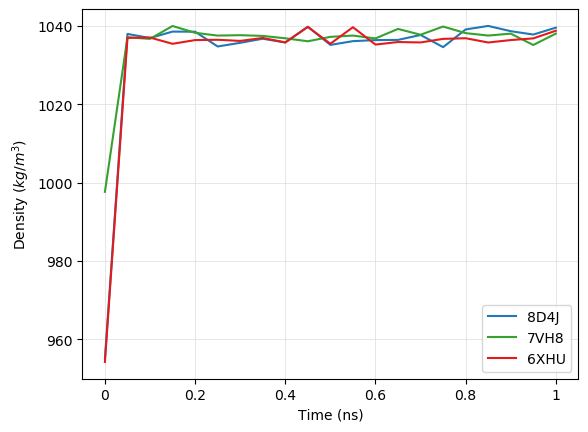

<Figure size 400x400 with 0 Axes>

In [82]:
dens_df3=pd.read_csv(DENS_8D4J_3, sep='\s+', header=None, names=['time (ps)','density'])
dens_8d4j3 = dens_df3.to_numpy()

dens_dfwt=pd.read_csv(DENS_7VH8, sep='\s+', header=None, names=['time (ps)','density'])
dens_7vh8 = dens_dfwt.to_numpy()

dens_dfwt=pd.read_csv(DENS_6XHU, sep='\s+', header=None, names=['time (ps)','density'])
dens_6xhu = dens_dfwt.to_numpy()

f = plt.figure()
ax = f.add_subplot(111)
ax.plot(dens_8d4j3[:,0], dens_8d4j3[:,1], color = colors[1], label = "8D4J")
ax.plot(dens_7vh8[:,0], dens_7vh8[:,1], color = colors[3], label = "7VH8")
ax.plot(dens_6xhu[:,0], dens_6xhu[:,1], color = colors[5], label = "6XHU")



scale_x = 1e3
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks)
ax.grid(color = '#DCDCDC', lw = 0.5)
ax.set_xlabel("Time (ns)")
ax.set_ylabel(r"Density ($kg/m^3$)") 
ax.legend()
ax.grid(color = '#DCDCDC', lw = 0.5)

plt.figure(figsize=[4,4])